In [3]:
# Import Matplotlib, Numpy, Seaborn, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# Read the CSV file.
fitness = pd.read_csv('daily_activity.csv')

In [8]:
# View the DataFrame.
print(fitness.shape)
print(fitness.dtypes)
print(fitness.columns)
fitness.head()

(940, 15)
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
# Create a DataFrame with specified columns.
distance = fitness[['Id', 'ActivityDate', 'VeryActiveDistance',
                   'ModeratelyActiveDistance', 'LightActiveDistance',
                   'SedentaryActiveDistance']]
# View the DataFrame.
print(distance.head())

           Id ActivityDate  VeryActiveDistance  ModeratelyActiveDistance  \
0  1503960366    4/12/2016                1.88                      0.55   
1  1503960366    4/13/2016                1.57                      0.69   
2  1503960366    4/14/2016                2.44                      0.40   
3  1503960366    4/15/2016                2.14                      1.26   
4  1503960366    4/16/2016                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  
0                 6.06                      0.0  
1                 4.71                      0.0  
2                 3.91                      0.0  
3                 2.83                      0.0  
4                 5.04                      0.0  


In [11]:
# Reshape the DataFrame from wide to long. 
distance_long = distance.melt(id_vars=['Id', 'ActivityDate'], 
                              var_name='DistanceType', value_name='Distance')

# View the DataFrame.
print(distance_long.head())

           Id ActivityDate        DistanceType  Distance
0  1503960366    4/12/2016  VeryActiveDistance      1.88
1  1503960366    4/13/2016  VeryActiveDistance      1.57
2  1503960366    4/14/2016  VeryActiveDistance      2.44
3  1503960366    4/15/2016  VeryActiveDistance      2.14
4  1503960366    4/16/2016  VeryActiveDistance      2.71


In [12]:
# Format values in the columns.
distance_long['DistanceType'] = distance_long['DistanceType'].str.replace('ActiveDistance', "")

In [13]:
# Add a filter to identify logged-in user.
individual = distance_long[distance_long['Id'] == 1503960366]

<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

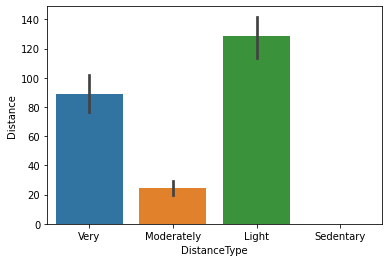

In [14]:
# Create a barplot.
sns.barplot(x='DistanceType', y='Distance', estimator=sum, data=individual)

<AxesSubplot:>

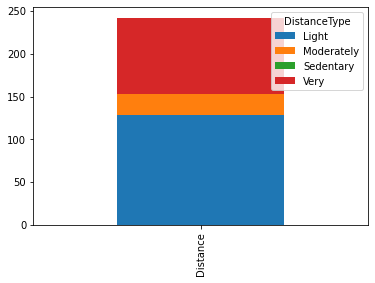

In [15]:
# Stacked barplots with Pandas.
individual.groupby('DistanceType')[['Distance']].sum().T.plot.bar(stacked=True)

<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

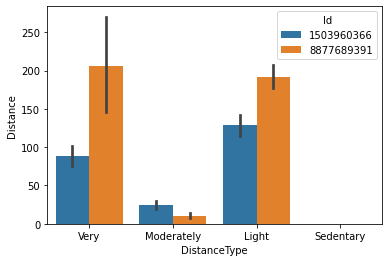

In [17]:
# Pair the data of two individuals.
pair = distance_long[distance_long['Id'].isin([8877689391, 1503960366])]

# Create a grouped barplot.
sns.barplot(x='DistanceType', y='Distance', hue='Id', estimator=sum, data=pair)